# **Project**

# **Final Project - Analyzing Sales Data**

**Date**: 30 April 2024

**Author**: Piyawat Yosthanayon

**Course**: `Pandas Foundation`

In [17]:
# import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

df = pd.read_csv("sample-store.csv")

In [15]:
# preview top 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# shape of dataframe
df.shape

(9994, 21)

In [4]:
# see data frame information using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

We can use `pd.to_datetime()` function to convert columns 'Order Date' and 'Ship Date' to datetime.

In [5]:
# example of pd.to_datetime() function
pd.to_datetime(df['Order Date'].head(), format='%m/%d/%Y')

0   2019-11-08
1   2019-11-08
2   2019-06-12
3   2018-10-11
4   2018-10-11
Name: Order Date, dtype: datetime64[ns]

In [18]:
# TODO - convert order date and ship date to datetime in the original dataframe

df["Order Date"] = pd.to_datetime(df["Order Date"], format='%m/%d/%Y')
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format='%m/%d/%Y')

In [7]:
# TODO - count nan in postal code column
df[["Postal Code"]].isna().sum()

Postal Code    11
dtype: int64

In [8]:
# TODO - filter rows with missing values
no_pos_code = df[df["Postal Code"].isna()]
no_pos_code.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2020-104066,2020-12-05,2020-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2018-162887,2018-11-07,2018-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2019-150140,2019-04-06,2019-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336


In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<Axes: xlabel='Category'>

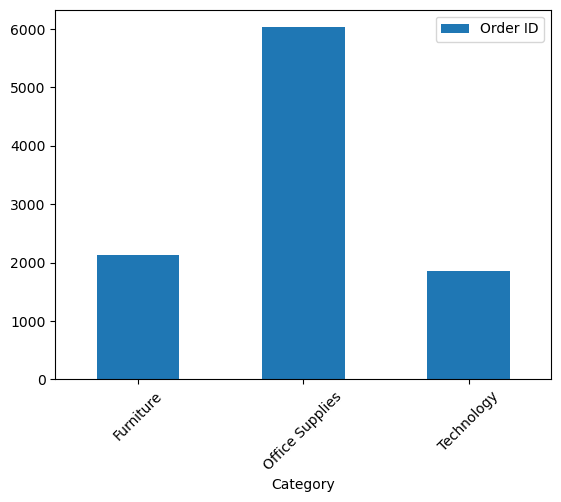

In [10]:
# TODO - Explore this dataset on your owns, ask your own questions

# How many products are there in each category?
df.groupby("Category")[["Order ID"]].count().plot.bar(rot = 45)

## Data Analysis Part

Answer 10 below questions to get credit from this course. Write `pandas` code to find answers.

In [11]:
# TODO 01 - how many columns, rows in this dataset
di = df.shape
print(f"row: {di[0]}\ncol: {di[1]}")

row: 9994
col: 21


In [12]:
# TODO 02 - is there any missing values?, if there is, which colunm? how many nan values?
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [13]:
# TODO 03 - your friend ask for `California` data, filter it and export csv for him
cfn_data = df[df["State"] == "California"]

cfn_data.to_csv("California_data.csv", index = False)

In [45]:
# TODO 04 - your friend ask for all order data in `California` and `Texas` in 2017 (look at Order Date), send him csv file
cfn_txs_2017 = df[ df["State"].isin(["California","Texas"]) &\
    ( (df['Order Date'] >= '2017-01-01') & (df['Order Date'] < '2018-01-01') ) ]

cfn_txs_2017.to_csv("California_and_Texas_2017.csv", index = False)

In [25]:
# TODO 05 - how much total sales, average sales, and standard deviation of sales your company make in 2017
df_2017 = df[ (df['Order Date'] >= '2017-01-01') & (df['Order Date'] < '2018-01-01') ]

ts = df_2017["Sales"].sum()
avgs = df_2017["Sales"].mean()
sds = df_2017["Sales"].std()

print(f"in 2017\ntotal sales: {ts:,.2f}\naverage_sales: {avgs:,.2f}\nstandard deviation: {sds:,.2f}")

in 2017
total sales: 484,247.50
average_sales: 242.97
standard deviation: 754.05


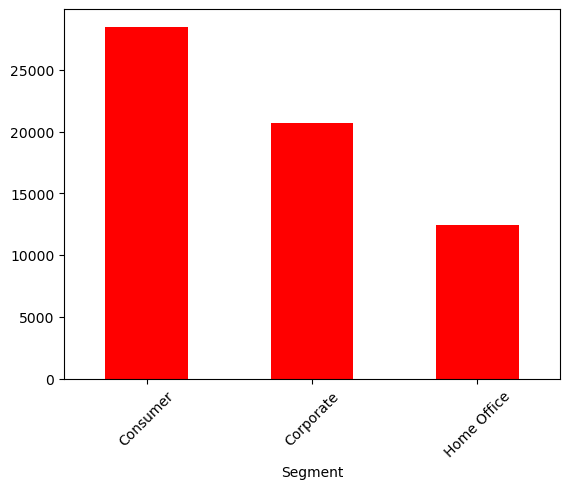

In [13]:
# TODO 06 - which Segment has the highest profit in 2018
df_2018 = df[ (df['Order Date'] >= '2018-01-01') & (df['Order Date'] < '2019-01-01') ]

df_2018.groupby("Segment")["Profit"].sum().plot.bar(rot = 45 , color="red");

In [19]:
# TODO 07 - which top 5 States have the least total sales between 15 April 2019 - 31 December 2019
df_2019_april15_dec31 = df[ (df['Order Date'] >= '2019-04-15') & (df['Order Date'] <= '2019-12-31') ]

df_2019_april15_dec31.groupby("State")["Sales"].sum().sort_values().head(5)

State
New Hampshire            49.05
New Mexico               64.08
District of Columbia    117.07
Louisiana               249.80
South Carolina          502.48
Name: Sales, dtype: float64

In [38]:
# TODO 08 - what is the proportion of total sales (%) in West + Central in 2019 e.g. 25% 
df_2019 = df[ (df['Order Date'] >= '2019-01-01') & (df['Order Date'] < '2020-01-01') ]

sales2019_sum = df_2019.groupby("Region")[["Sales"]].sum().reset_index()

WC_total  = sales2019_sum[ sales2019_sum["Region"].isin( ["Central","West"] ) ].Sales.sum()
All_total = sales2019_sum.Sales.sum()

print(f"total sales (%) in West + Central in 2019 = {WC_total/All_total:.2%}")

total sales (%) in West + Central in 2019 = 54.97%


In [60]:
# TODO 09 - find top 10 popular products in terms of number of orders vs. total sales during 2019-2020
df_19_20 = df[ (df['Order Date'] >= '2019-01-01') & (df['Order Date'] < '2021-01-01') ]

pop_products = df_19_20["Product Name"].value_counts().sort_values(ascending=False).reset_index().head(10)

total_products_sum = df_19_20.groupby("Product Name")[["Sales"]].sum().reset_index()

pd.merge(pop_products,total_products_sum, on = "Product Name")

,Product Name,count,Sales
0,Easy-staple paper,27,1481.728
1,Staples,24,462.068
2,Staple envelope,22,644.936
3,Staples in misc. colors,13,357.164
4,Chromcraft Round Conference Tables,12,7965.053
5,Storex Dura Pro Binders,12,176.418
6,Staple remover,12,204.512
7,"Global Wood Trimmed Manager's Task Chair, Khaki",11,2793.086
8,Avery Non-Stick Binders,11,122.128
9,Sterilite Officeware Hinged File Box,10,314.400


<Axes: xlabel='Region', ylabel='Profit'>

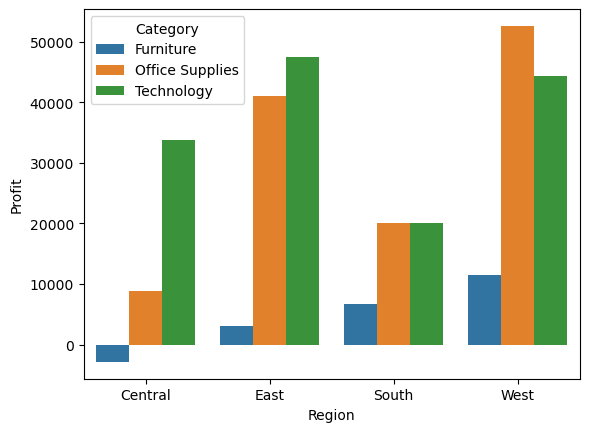

In [29]:
# TODO 10 - plot at least 2 plots, any plot you think interesting :)

# 1st chart : Profit vs Region and Category

df2 = df.groupby(["Region","Category"])["Profit"].sum().reset_index()

sns.barplot(x='Region', y='Profit', hue='Category', data=df2)

<Axes: xlabel='Year', ylabel='Profit'>

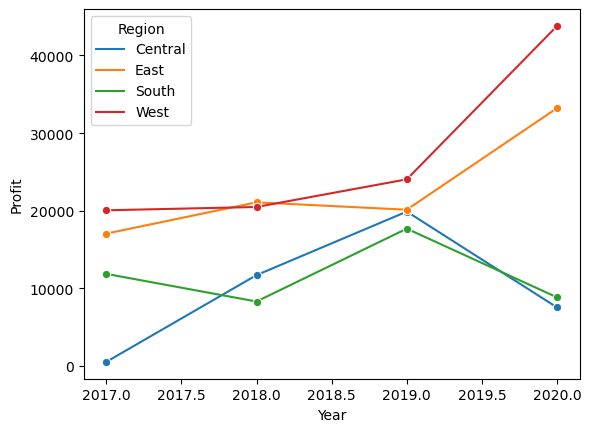

In [21]:
# 2nd chart : Profit vs Year

df3 = df.copy()

# Create a new column for year
df3['Year'] = df3['Order Date'].dt.year

# Group by 'Year' and 'Region', then sum the profit
yearly_profit = df3.groupby(['Year', 'Region'])['Profit'].sum().reset_index()

# Suppress warnings
warnings.filterwarnings("ignore")

# Create line plot
sns.lineplot(data=yearly_profit, x='Year', y='Profit', hue='Region', marker='o')

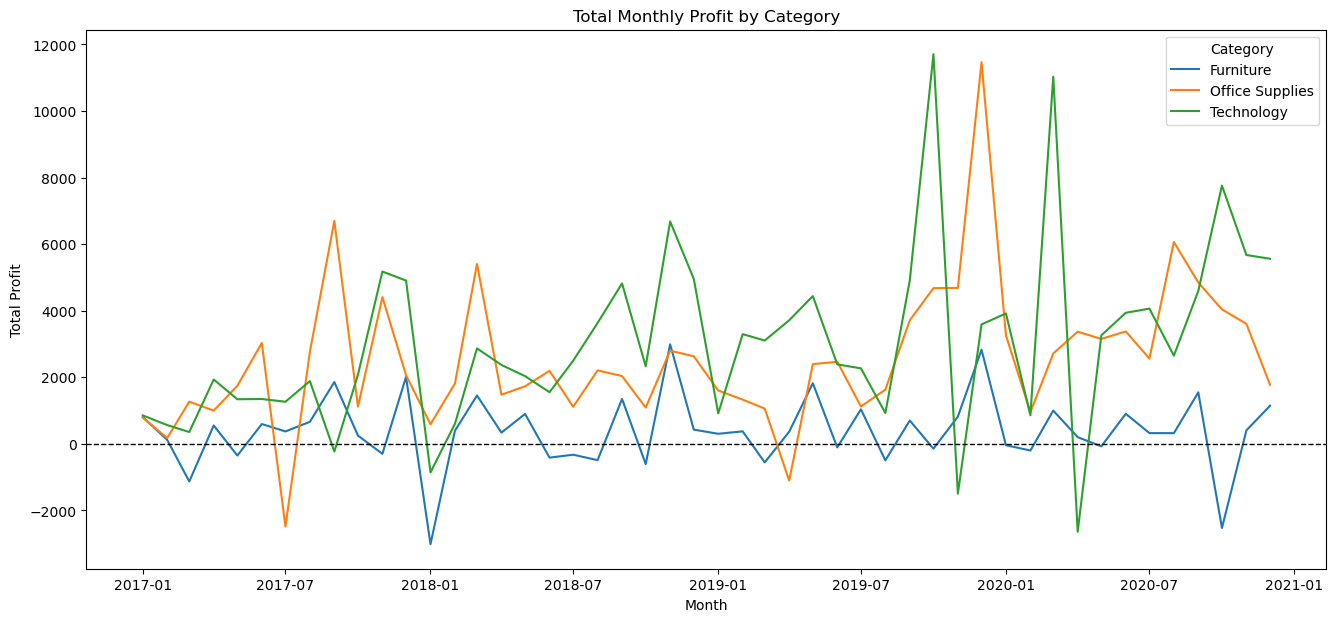

In [32]:
# 3rd chart : Profit vs Month

df4 = df.copy()

# Create a new column for year-month
df4['Year-Month'] = df4['Order Date'].dt.to_period('M')

# Group by 'Year-Month' and 'Category', then sum the Profit
monthly_profit = df4.groupby(['Year-Month', 'Category'])['Profit'].sum().reset_index()

# Convert 'Year-Month' back to datetime for plotting
monthly_profit['Year-Month'] = monthly_profit['Year-Month'].dt.to_timestamp()

# Set up the matplotlib figure
plt.figure(figsize=(16, 7))

# Create line plot
sns.lineplot(data=monthly_profit, x='Year-Month', y='Profit', hue='Category')

# Add a black dotted line at 0 total profit
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Add title and labels
plt.title('Total Monthly Profit by Category')
plt.xlabel('Month')
plt.ylabel('Total Profit')

# Show plot
plt.show()


In [40]:
# TODO Bonus - use np.where() to create new column in dataframe to help you answer your own questions

# High Profit

# Define the threshold for high profit
threshold = 5000

ym_profit = df4.groupby(['Year-Month', 'Category'])['Profit'].sum().reset_index()

# Use np.where() to create a new column 'High Profit'
ym_profit['High Profit'] = np.where(ym_profit['Profit'] > threshold, 'Yes', 'No')

# Filter for interesting months
ym_profit[ ym_profit["High Profit"] == "Yes" ] 

,Year-Month,Category,Profit,High Profit
25,2017-09,Office Supplies,6699.5402,Yes
32,2017-11,Technology,5178.0667,Yes
43,2018-03,Office Supplies,5407.8482,Yes
68,2018-11,Technology,6682.7355,Yes
101,2019-10,Technology,11707.7475,Yes
106,2019-12,Office Supplies,11466.6686,Yes
116,2020-03,Technology,11035.0759,Yes
130,2020-08,Office Supplies,6067.8582,Yes
137,2020-10,Technology,7761.4207,Yes
140,2020-11,Technology,5674.9371,Yes
